In [ ]:
%load_ext blackcellmagic

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    f1_score,
    recall_score,
    precision_score,
)

# Ignoring the warning for plots
import warnings

warnings.filterwarnings("ignore")


# Loading the data
data = pd.read_csv("winequality.csv")
data["recommend"] = data["recommend"].astype(int)

# Dropping 'quality' from data
data = data.drop(["quality"], axis=1)

# Scaling the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data.values)
data_scaled = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)
data_scaled["recommend"] = data["recommend"]

# Defining X and Y
X = data_scaled.iloc[:, 0:-1]
y = data_scaled.iloc[:, -1]

# Setting the models to be used
models = []
models.append(("LR", LogisticRegression(solver="lbfgs", random_state=0, max_iter=800)))
models.append(
    (
        "GBC",
        GradientBoostingClassifier(
            n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0
        ),
    )
)

In [2]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0
)

results = []
model_name = []
f1_values = []
auc_values = []
precision_scores = []
recall_scores = []
results_df = X_test.copy()

for name, model in models:
    current_model = model.fit(X_train, y_train)
    prediction_probs = current_model.predict_proba(X_test)
    prediction = current_model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    model_name.append(name)
    results.append(accuracy)
    f1 = f1_score(y_test, prediction)
    f1_values.append(f1)
    auc_value = roc_auc_score(y_test, prediction)
    auc_values.append(auc_value)
    precision = precision_score(y_test, prediction, average="binary")
    precision_scores.append(precision)
    recall = recall_score(y_test, prediction, average="binary")
    recall_scores.append(recall)
    results_df[str(name) + " prediction"] = prediction
    results_df[str(name) + " probs_0"] = prediction_probs[:, 0]
    results_df[str(name) + " probs_1"] = prediction_probs[:, 1]
    results_df[str(name) + " difference"] = y_test - prediction

In [3]:
df_thres_split = pd.DataFrame()
df_thres_split["Model name"] = model_name
df_thres_split["Accuracy"] = results
df_thres_split["F1 values"] = f1_values
df_thres_split["AUC"] = auc_values
df_thres_split["Precision"] = precision_scores
df_thres_split["Recall"] = recall_scores


print(pd.DataFrame(df_thres_split))

  Model name  Accuracy  F1 values       AUC  Precision    Recall
0         LR  0.738776   0.255814  0.564286   0.687500  0.157143
1        GBC  0.816327   0.594595  0.712857   0.804878  0.471429


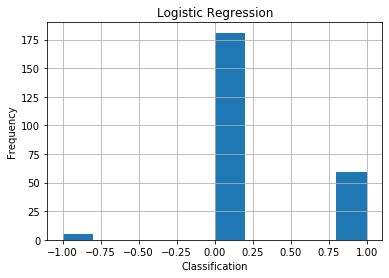

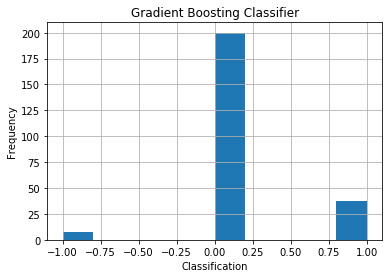

In [4]:
plt.hist(results_df["LR difference"])
plt.xlabel("Classification")
plt.ylabel("Frequency")
plt.title("Logistic Regression")
plt.grid(True)

plt.show()

plt.hist(results_df["GBC difference"])
plt.xlabel("Classification")
plt.ylabel("Frequency")
plt.title("Gradient Boosting Classifier")
plt.grid(True)

plt.show()

In [5]:
# Creating a dataframe for the misclassified values with LR and GBC
FP_LR = results_df.loc[results_df["LR difference"] < 0]
FN_LR = results_df.loc[results_df["LR difference"] > 0]

FP_GBC = results_df.loc[results_df["GBC difference"] < 0]
FN_GBC = results_df.loc[results_df["GBC difference"] > 0]

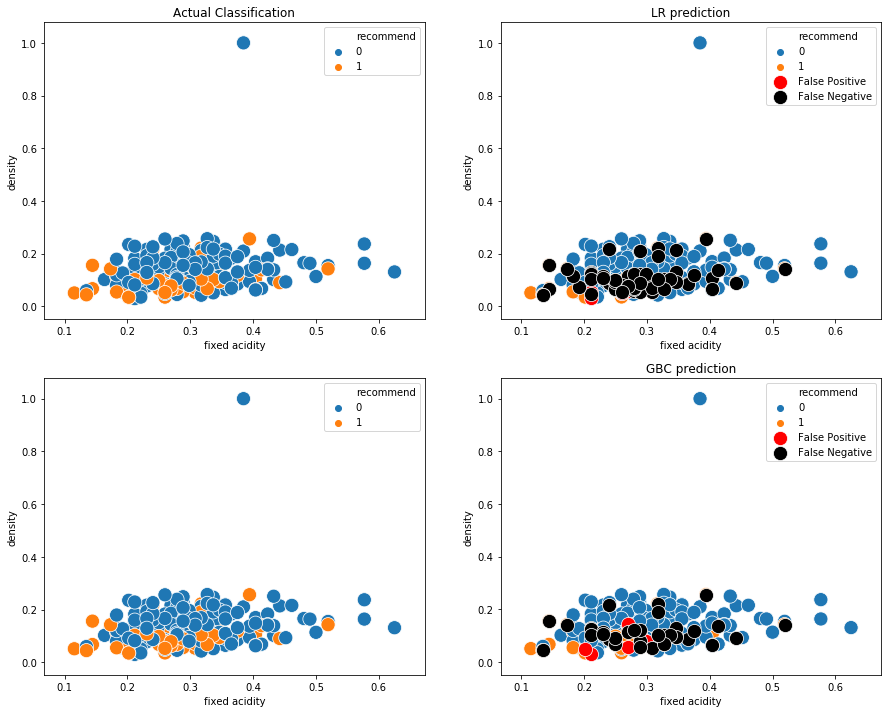

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
sns.scatterplot(
    x=X_test["fixed acidity"], y=X_test["density"], hue=y_test, s=200, ax=ax[0, 0]
).set_title("Actual Classification")
sns.scatterplot(
    x=X_test["fixed acidity"], y=X_test["density"], hue=y_test, s=200, ax=ax[0, 1]
)
sns.scatterplot(
    x=X_test["fixed acidity"], y=X_test["density"], hue=y_test, s=200, ax=ax[1, 0]
)
sns.scatterplot(
    x=X_test["fixed acidity"], y=X_test["density"], hue=y_test, s=200, ax=ax[1, 1]
)
sns.scatterplot(
    x=FP_LR["fixed acidity"],
    y=FP_LR["density"],
    color="r",
    s=200,
    label="False Positive",
    ax=ax[0, 1],
).set_title("LR prediction")
sns.scatterplot(
    x=FN_LR["fixed acidity"],
    y=FN_LR["density"],
    color="k",
    s=200,
    label="False Negative",
    ax=ax[0, 1],
)
sns.scatterplot(
    x=FP_GBC["fixed acidity"],
    y=FP_GBC["density"],
    color="r",
    s=200,
    label="False Positive",
    ax=ax[1, 1],
).set_title("GBC prediction")
sns.scatterplot(
    x=FN_GBC["fixed acidity"],
    y=FN_GBC["density"],
    color="k",
    s=200,
    label="False Negative",
    ax=ax[1, 1],
)
fig.show()

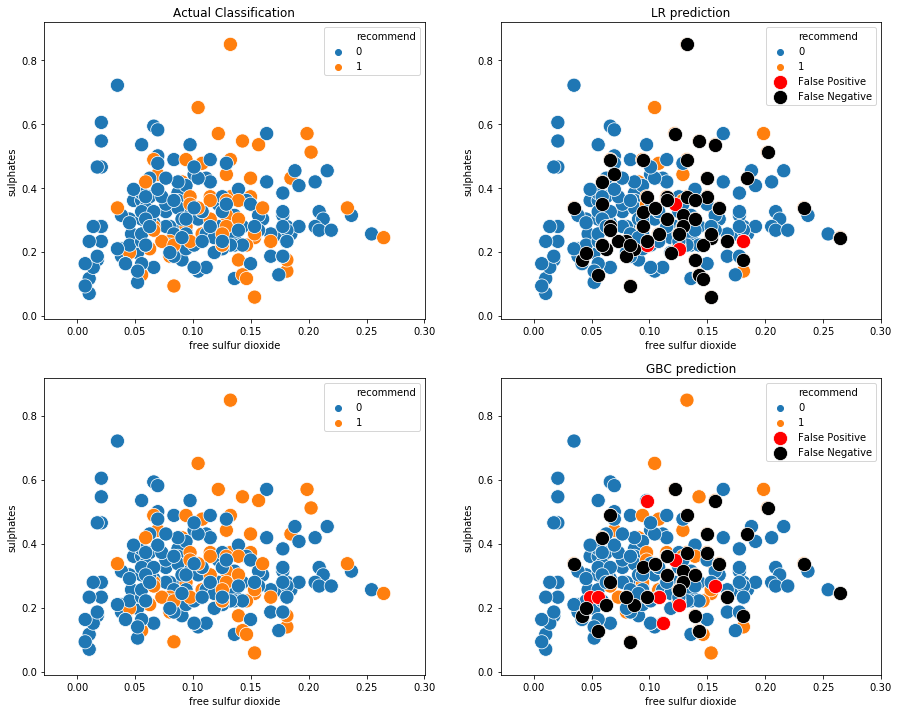

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
sns.scatterplot(
    x=X_test["free sulfur dioxide"],
    y=X_test["sulphates"],
    hue=y_test,
    s=200,
    ax=ax[0, 0],
).set_title("Actual Classification")
sns.scatterplot(
    x=X_test["free sulfur dioxide"],
    y=X_test["sulphates"],
    hue=y_test,
    s=200,
    ax=ax[0, 1],
)
sns.scatterplot(
    x=X_test["free sulfur dioxide"],
    y=X_test["sulphates"],
    hue=y_test,
    s=200,
    ax=ax[1, 0],
)
sns.scatterplot(
    x=X_test["free sulfur dioxide"],
    y=X_test["sulphates"],
    hue=y_test,
    s=200,
    ax=ax[1, 1],
)
sns.scatterplot(
    x=FP_LR["free sulfur dioxide"],
    y=FP_LR["sulphates"],
    color="r",
    s=200,
    label="False Positive",
    ax=ax[0, 1],
).set_title("LR prediction")
sns.scatterplot(
    x=FN_LR["free sulfur dioxide"],
    y=FN_LR["sulphates"],
    color="k",
    s=200,
    label="False Negative",
    ax=ax[0, 1],
)
sns.scatterplot(
    x=FP_GBC["free sulfur dioxide"],
    y=FP_GBC["sulphates"],
    color="r",
    s=200,
    label="False Positive",
    ax=ax[1, 1],
).set_title("GBC prediction")
sns.scatterplot(
    x=FN_GBC["free sulfur dioxide"],
    y=FN_GBC["sulphates"],
    color="k",
    s=200,
    label="False Negative",
    ax=ax[1, 1],
)

fig.show()

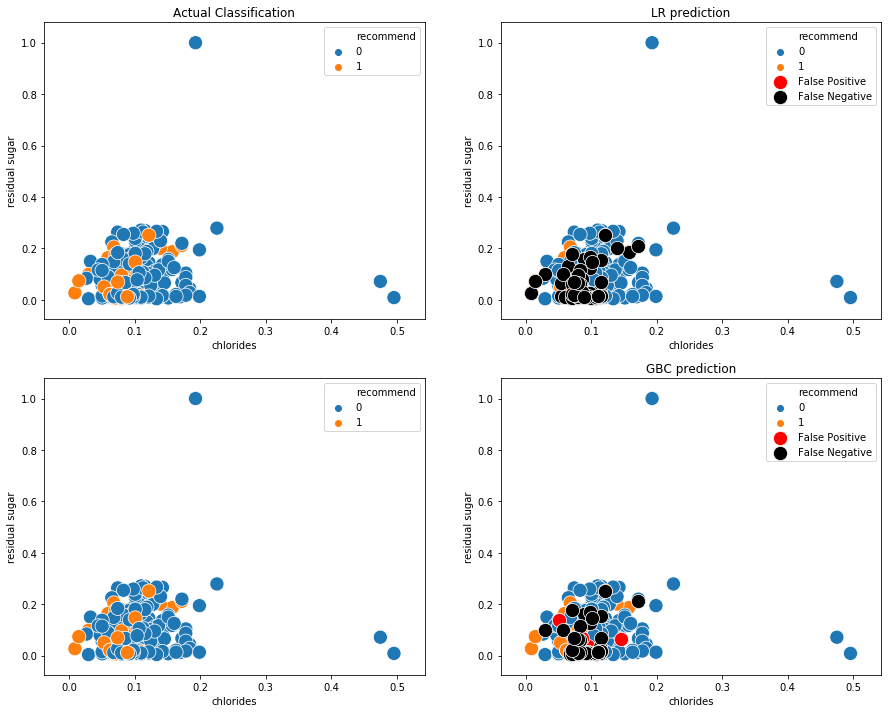

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
sns.scatterplot(
    x=X_test["chlorides"], y=X_test["residual sugar"], hue=y_test, s=200, ax=ax[0, 0]
).set_title("Actual Classification")
sns.scatterplot(
    x=X_test["chlorides"], y=X_test["residual sugar"], hue=y_test, s=200, ax=ax[0, 1]
)
sns.scatterplot(
    x=X_test["chlorides"], y=X_test["residual sugar"], hue=y_test, s=200, ax=ax[1, 0]
)
sns.scatterplot(
    x=X_test["chlorides"], y=X_test["residual sugar"], hue=y_test, s=200, ax=ax[1, 1]
)
sns.scatterplot(
    x=FP_LR["chlorides"],
    y=FP_LR["residual sugar"],
    color="r",
    s=200,
    label="False Positive",
    ax=ax[0, 1],
).set_title("LR prediction")
sns.scatterplot(
    x=FN_LR["chlorides"],
    y=FN_LR["residual sugar"],
    color="k",
    s=200,
    label="False Negative",
    ax=ax[0, 1],
)
sns.scatterplot(
    x=FP_GBC["chlorides"],
    y=FP_GBC["residual sugar"],
    color="r",
    s=200,
    label="False Positive",
    ax=ax[1, 1],
).set_title("GBC prediction")
sns.scatterplot(
    x=FN_GBC["chlorides"],
    y=FN_GBC["residual sugar"],
    color="k",
    s=200,
    label="False Negative",
    ax=ax[1, 1],
)

fig.show()

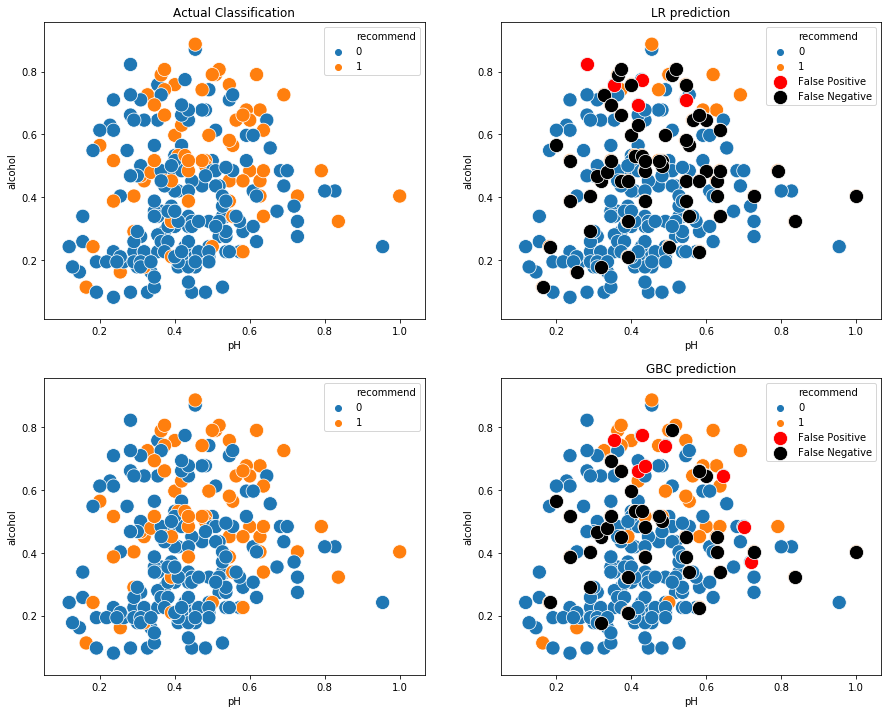

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
sns.scatterplot(
    x=X_test["pH"], y=X_test["alcohol"], hue=y_test, s=200, ax=ax[0, 0]
).set_title("Actual Classification")
sns.scatterplot(x=X_test["pH"], y=X_test["alcohol"], hue=y_test, s=200, ax=ax[0, 1])
sns.scatterplot(x=X_test["pH"], y=X_test["alcohol"], hue=y_test, s=200, ax=ax[1, 0])
sns.scatterplot(x=X_test["pH"], y=X_test["alcohol"], hue=y_test, s=200, ax=ax[1, 1])
sns.scatterplot(
    x=FP_LR["pH"],
    y=FP_LR["alcohol"],
    color="r",
    s=200,
    label="False Positive",
    ax=ax[0, 1],
).set_title("LR prediction")
sns.scatterplot(
    x=FN_LR["pH"],
    y=FN_LR["alcohol"],
    color="k",
    s=200,
    label="False Negative",
    ax=ax[0, 1],
)
sns.scatterplot(
    x=FP_GBC["pH"],
    y=FP_GBC["alcohol"],
    color="r",
    s=200,
    label="False Positive",
    ax=ax[1, 1],
).set_title("GBC prediction")
sns.scatterplot(
    x=FN_GBC["pH"],
    y=FN_GBC["alcohol"],
    color="k",
    s=200,
    label="False Negative",
    ax=ax[1, 1],
)

fig.show()

## Conclusions
### Histogram classification x frequency
Gradient Boosting (GBC) had less false negatives (values equal 1) than Logistic Regression (LR). LR, however, resulted in less false positives (values equal -1) than GBC. GBC obtained more corrected predictions than LR (values equal 0).
### Acidity x density
The false negatives are concentrating on a density below 0.1 for LR.
### Chlorides x residual sugar
The false negatives are concentrating on a chlorides value between 0.05 and 0.13 for LR.
### Alcohol x pH
LR misclassified as negative examples which alcohol values were below 0.6.

In [10]:
# Dropping features to visualize the probabilities
features_list = ["GBC probs_0", "GBC probs_1"]

for feature in FP_GBC:
    if feature not in features_list:
        FP_GBC = FP_GBC.drop(feature, axis=1)

for feature in FN_GBC:
    if feature not in features_list:
        FN_GBC = FN_GBC.drop(feature, axis=1)


features_list = ["LR probs_0", "LR probs_1"]

for feature in FP_LR:
    if feature not in features_list:
        FP_LR = FP_LR.drop(feature, axis=1)

for feature in FN_LR:
    if feature not in features_list:
        FN_LR = FN_LR.drop(feature, axis=1)

In [11]:
print("Logistic Regression \nProbabilities found for False Negatives")
FN_LR

Logistic Regression 
Probabilities found for False Negatives


,LR probs_0,LR probs_1
1419,0.814159,0.185841
1248,0.770581,0.229419
2586,0.940470,0.059530
3286,0.759338,0.240662
507,0.837390,0.162610
1464,0.589380,0.410620
3585,0.654390,0.345610
2452,0.669053,0.330947
2855,0.730929,0.269071
3579,0.709059,0.290941


In [12]:
print("Logistic Regression \nProbabilities found for False Positives")
FP_LR

Logistic Regression 
Probabilities found for False Positives


,LR probs_0,LR probs_1
4476,0.415624,0.584376
4168,0.458411,0.541589
3133,0.434615,0.565385
4837,0.400502,0.599498
2863,0.486318,0.513682


In [13]:
print("Gradient Boosting Classfier \nProbabilities found for False Negatives")
FN_GBC

Gradient Boosting Classfier 
Probabilities found for False Negatives


,GBC probs_0,GBC probs_1
1419,0.960490,0.039510
1248,0.790027,0.209973
3286,0.571277,0.428723
507,0.763008,0.236992
3585,0.841473,0.158527
3579,0.639882,0.360118
584,0.731648,0.268352
4655,0.514865,0.485135
158,0.517729,0.482271
1497,0.706861,0.293139


In [14]:
print("Gradient Boosting Classfier \nProbabilities found for False Positives")
FP_GBC

Gradient Boosting Classfier 
Probabilities found for False Positives


,GBC probs_0,GBC probs_1
4476,0.460695,0.539305
4366,0.404400,0.595600
3133,0.198020,0.801980
976,0.402273,0.597727
2118,0.479906,0.520094
2976,0.387360,0.612640
3512,0.401508,0.598492
4428,0.418626,0.581374


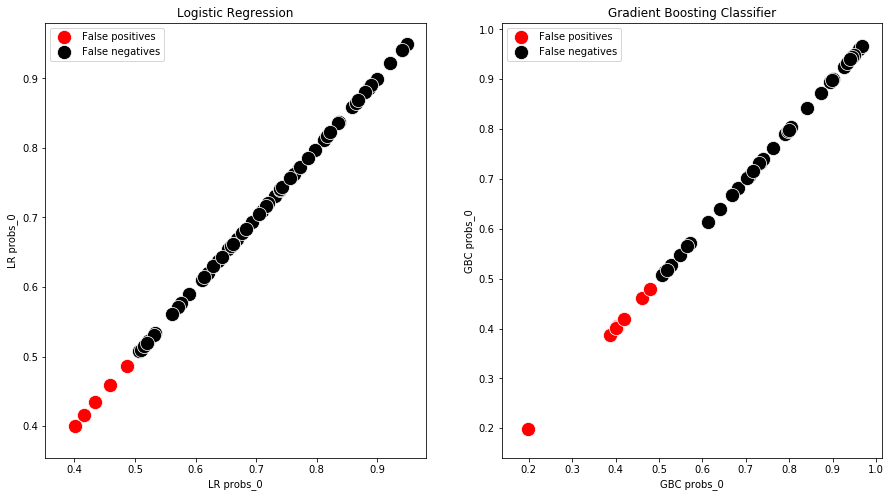

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(
    x=FP_LR["LR probs_0"],
    y=FP_LR["LR probs_0"],
    color="r",
    s=200,
    label="False positives",
    ax=ax[0],
).set_title("Logistic Regression")
sns.scatterplot(
    x=FN_LR["LR probs_0"],
    y=FN_LR["LR probs_0"],
    color="k",
    s=200,
    label="False negatives",
    ax=ax[0],
)
sns.scatterplot(
    x=FP_GBC["GBC probs_0"],
    y=FP_GBC["GBC probs_0"],
    color="r",
    s=200,
    label="False positives",
    ax=ax[1],
).set_title("Gradient Boosting Classifier")
sns.scatterplot(
    x=FN_GBC["GBC probs_0"],
    y=FN_GBC["GBC probs_0"],
    color="k",
    s=200,
    label="False negatives",
    ax=ax[1],
)
fig.show()

## Observation
Here we can see the threshold used by both models. It is by default equals to 0.5. I want to evaluate the effect of changing the threshold of my models.

In [16]:
def threshold_influence(results_df, threshold, y_test):
    LR_prediction = []
    GBC_prediction = []
    for value in results_df["LR probs_0"]:
        if value > threshold:
            LR_prediction.append(0)
        else:
            LR_prediction.append(1)

    for value in results_df["GBC probs_0"]:
        if value > threshold:
            GBC_prediction.append(0)
        else:
            GBC_prediction.append(1)

    accuracy_LR = accuracy_score(y_test, LR_prediction)
    accuracy_GBC = accuracy_score(y_test, GBC_prediction)
    precision_LR = precision_score(y_test, LR_prediction, average="binary")
    precision_GBC = precision_score(y_test, GBC_prediction, average="binary")
    recall_LR = recall_score(y_test, LR_prediction, average="binary")
    recall_GBC = recall_score(y_test, GBC_prediction, average="binary")

    return accuracy_LR, accuracy_GBC, precision_LR, precision_GBC, recall_LR, recall_GBC

In [17]:
thresholds = [0.3,0.4,0.5,0.6,0.7]

dataframe = pd.DataFrame()

model_list = []
threshold_list = []
accuracy_list = [] 
precision_list = []
recall_list = []

for value in thresholds:
    
    accuracy_LR, accuracy_GBC, precision_LR, precision_GBC, recall_LR, recall_GBC = threshold_influence(results_df,value,y_test)
    
    model_list.append('LR')
    threshold_list.append(value)
    accuracy_list.append(accuracy_LR)
    precision_list.append(precision_LR)
    recall_list.append(recall_LR)

    model_list.append('GBC')
    threshold_list.append(value)
    accuracy_list.append(accuracy_GBC)
    precision_list.append(precision_GBC)
    recall_list.append(recall_GBC)
    
dataframe["model_name"] = model_list
dataframe["threshold"] = threshold_list
dataframe["accuracy"] = accuracy_list
dataframe["precision"] = precision_list
dataframe["recall"] = recall_list

dataframe.groupby(['model_name','threshold']).first()

accuracy  precision    recall
model_name threshold                               
GBC        0.3        0.787755   0.950000  0.271429
           0.4        0.816327   0.931034  0.385714
           0.5        0.816327   0.804878  0.471429
           0.6        0.812245   0.706897  0.585714
           0.7        0.795918   0.642857  0.642857
LR         0.3        0.714286   0.000000  0.000000
           0.4        0.734694   1.000000  0.071429
           0.5        0.738776   0.687500  0.157143
           0.6        0.734694   0.564103  0.314286
           0.7        0.730612   0.528571  0.528571

## Conclusion
Here we can see that, for this dataset, changing the threshold won't improve the performance.
